In [1]:
#UBC_MECH550N - Systems Engineering
#Data Analysis Assignment
#Submitted by: Janica Echavez (April 7, 2020)

#Objectives: In this assignment you are to import a dataset and create graphic results from the dataset with Python.
#Additional Comments:
#-Sources used are the .xlsx files from Github
#-These excel files are merged and analyzed using general statistical measure and forecasted using ML models
#-The selected 'label' for optimization is 'Consump1 Rate (kg/h)'
#-The selected 'test features' are Power, Speed and Engine1 Total Mass 
#These are selected as the fuel consumption is typically dependant on the Power and the Speed

In [2]:
#PART 1 (Python + Data and Visualization)

In [26]:
#Import Initialization
import pandas as pd
import numpy as np
import glob as glob
import seaborn as sns

import matplotlib.pyplot as plt

In [27]:
#Calling out of all relevant data sets saved under 'dataset_ship_1' folder
excelfiles = glob.glob('dataset_ship_1/'+'*.xlsx') 
print(excelfiles) 

len(excelfiles) #finding no. of excel files

['dataset_ship_1\\out_0.xlsx', 'dataset_ship_1\\out_1.xlsx', 'dataset_ship_1\\out_2.xlsx', 'dataset_ship_1\\out_3.xlsx', 'dataset_ship_1\\out_4.xlsx', 'dataset_ship_1\\out_5.xlsx', 'dataset_ship_1\\out_6.xlsx']


7

In [28]:
#Consolidating into one consistent database
#all relevant dataframes are first made
df = pd.DataFrame() 
all_data = pd.DataFrame()

for i in range(len(excelfiles)): #iteration to go over all relevant excel files excel files
    print('Processing: '+str(excelfiles[i].split('/')[-1].split('.')[0])) #print prompt that merging is starting for every file
    df = pd.read_excel(excelfiles[i],header=0,index_col=0,dtype='a') #reading data from each excel file for every importing run
    all_data = all_data.append(df) #appending all df files into one larger all_data database
    
    del df #clean up memory to avoid redundancy
    print(str(i+1) + ' done of ' + str(len(excelfiles)))

df = all_data.sort_index() #sorts all the contents by labels and stores back in the empty df database

del all_data #clean up the memory of the all_data database

#Converting data into numeric so dtype is not an object
df_out = pd.DataFrame() #create a new database to quicken process

for i in range(len(list(df))): #iteration to go over all contents per heading 
     df_out[list(df)[i]] = pd.to_numeric(df[list(df)[i]],errors='coerce') #'coerce' is used to make sure all data is considered a float or int

#Export out for ease of recovery in the future
df_out.to_excel('all_data_1year.xlsx')

print('Finished!') #print out finished when done

Processing: dataset_ship_1\out_0
1 done of 7
Processing: dataset_ship_1\out_1
2 done of 7
Processing: dataset_ship_1\out_2
3 done of 7
Processing: dataset_ship_1\out_3
4 done of 7
Processing: dataset_ship_1\out_4


C:\Users\jale2\Anaconda\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


5 done of 7
Processing: dataset_ship_1\out_5
6 done of 7
Processing: dataset_ship_1\out_6
7 done of 7
Finished!


In [30]:
df_out

,Aux Power1 (kW),Consump1 Rate (kg/h),Consump2 Rate (kg/h),Eng1 Tot1 Mass (kg),Eng1 Tot2 Mass (kg),Eng2 Tot1 Mass (kg),Eng2 Tot2 Mass (kg),Gps Speed (kn),Power1 (kW),Speed 1 (rpm),SpeedlogSpeed (kn),Torque 1 (kNm)
2018-10-23 19:00:50,395.0,NaN,NaN,1040566,73799,155042,44957,NaN,NaN,NaN,NaN,NaN
2018-10-23 19:01:50,404.0,NaN,NaN,1040566,73799,155042,44962,NaN,NaN,NaN,NaN,NaN
2018-10-23 19:02:50,398.0,NaN,NaN,1040566,73799,155042,44962,NaN,NaN,NaN,NaN,NaN
2018-10-23 19:03:50,398.0,NaN,NaN,1040566,73799,155042,44962,NaN,NaN,NaN,NaN,NaN
2018-10-23 19:04:50,382.0,NaN,NaN,1040566,73799,155042,44962,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-02-08 14:05:31,524.0,0.0,96.0,3158245,93615,396187,62049,0.2,0.0,0.0,0.0,3.0
2019-02-08 14:06:31,536.0,0.0,97.6,3158245,93615,396187,62049,0.2,0.0,0.0,0.0,3.0
2019-02-08 14:07:31,570.0,0.0,103.6,3158245,93615,396187,62049,0.1,0.0,0.0,0.0,3.0
2019-02-08 14:08:31,591.0,0.0,107.8,3158245,93615,396187,62049,0.2,0.0,0.0,0.0,3.0


In [31]:
#optionally read from the merged excel file
df_out=pd.read_excel('all_data_1year.xlsx',header=0,index_col=0)

In [32]:
df_out

,Aux Power1 (kW),Consump1 Rate (kg/h),Consump2 Rate (kg/h),Eng1 Tot1 Mass (kg),Eng1 Tot2 Mass (kg),Eng2 Tot1 Mass (kg),Eng2 Tot2 Mass (kg),Gps Speed (kn),Power1 (kW),Speed 1 (rpm),SpeedlogSpeed (kn),Torque 1 (kNm)
2018-10-23 19:00:50,395.0,NaN,NaN,1040566,73799,155042,44957,NaN,NaN,NaN,NaN,NaN
2018-10-23 19:01:50,404.0,NaN,NaN,1040566,73799,155042,44962,NaN,NaN,NaN,NaN,NaN
2018-10-23 19:02:50,398.0,NaN,NaN,1040566,73799,155042,44962,NaN,NaN,NaN,NaN,NaN
2018-10-23 19:03:50,398.0,NaN,NaN,1040566,73799,155042,44962,NaN,NaN,NaN,NaN,NaN
2018-10-23 19:04:50,382.0,NaN,NaN,1040566,73799,155042,44962,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-02-08 14:05:31,524.0,0.0,96.0,3158245,93615,396187,62049,0.2,0.0,0.0,0.0,3.0
2019-02-08 14:06:31,536.0,0.0,97.6,3158245,93615,396187,62049,0.2,0.0,0.0,0.0,3.0
2019-02-08 14:07:31,570.0,0.0,103.6,3158245,93615,396187,62049,0.1,0.0,0.0,0.0,3.0
2019-02-08 14:08:31,591.0,0.0,107.8,3158245,93615,396187,62049,0.2,0.0,0.0,0.0,3.0


In [33]:
#Verify if all data is numeric 
check=pd.DataFrame() #create a new data base for no-numeric objects
check=df_out.select_dtypes(exclude=[np.number]) #import non-numeric values into check from df_out database
check.empty #verifies if this is empty or not

True

In [34]:
#This means all values are in not objects and so plotting and analysis can be done

In [35]:
#Renaming Headers for ease of calling each column
features=list(df_out)

In [36]:
features

['Aux Power1 (kW)',
 'Consump1 Rate (kg/h)',
 'Consump2 Rate  (kg/h)',
 'Eng1 Tot1 Mass (kg)',
 'Eng1 Tot2 Mass (kg)',
 'Eng2 Tot1 Mass (kg)',
 'Eng2 Tot2 Mass (kg)',
 'Gps Speed (kn)',
 'Power1 (kW)',
 'Speed 1 (rpm)',
 'SpeedlogSpeed (kn)',
 'Torque 1 (kNm)']

In [37]:
#Cleaning or Filtering of the Data

#removes any empty of NaN values
df_out=df_out.dropna()

In [38]:
#filters auxiliary power to values between 150-300kW
df_out=df_out[(df_out[features[0]]>150)&(df_out[features[0]]<350)] 

In [39]:
#filters out consumption rate less than 1
df_out=df_out[(df_out[features[1]]>1)]

In [40]:
df_out

,Aux Power1 (kW),Consump1 Rate (kg/h),Consump2 Rate (kg/h),Eng1 Tot1 Mass (kg),Eng1 Tot2 Mass (kg),Eng2 Tot1 Mass (kg),Eng2 Tot2 Mass (kg),Gps Speed (kn),Power1 (kW),Speed 1 (rpm),SpeedlogSpeed (kn),Torque 1 (kNm)
2018-11-10 11:10:33,347.0,1066.4,89.4,1536410,74495,196313,45181,11.4,4744.0,74.0,11.6,613.0
2018-11-10 16:49:33,348.0,1087.9,86.5,1542371,74495,196851,45181,12.0,5016.0,76.0,12.3,626.0
2018-11-10 17:05:33,349.0,1078.6,85.6,1542668,74495,196875,45181,11.9,4955.0,76.0,12.3,622.0
2018-11-10 19:01:33,347.0,1083.8,89.8,1544741,74495,197058,45181,11.6,5003.0,76.0,12.3,627.0
2018-11-10 19:08:33,347.0,1082.0,85.0,1544860,74495,197068,45181,11.7,4937.0,76.0,12.4,619.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-02-08 09:49:31,259.0,83.0,71.9,3158245,93611,396187,61728,0.2,0.0,0.0,0.0,5.0
2019-02-08 10:08:31,286.0,1.1,74.3,3158245,93611,396187,61753,0.2,0.0,0.0,0.0,5.0
2019-02-08 11:49:31,267.0,118.0,73.5,3158245,93612,396187,61879,0.1,0.0,0.0,0.0,6.0
2019-02-08 13:07:31,297.0,3.8,75.5,3158245,93613,396187,61974,0.1,0.0,0.0,0.0,6.0


In [41]:
#Data Visualization and Explore
#To see if the data makes sense, a few plots are tested

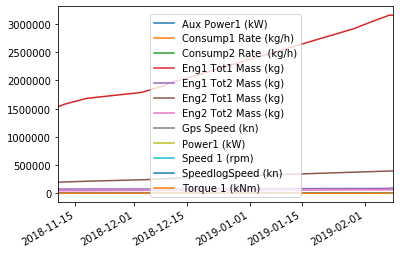

In [42]:
df_out.plot() #plot all content over the datetime

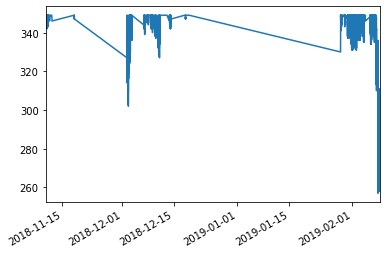

In [43]:
df_out[features[0]].plot() #sample plot of only the Aux. Power

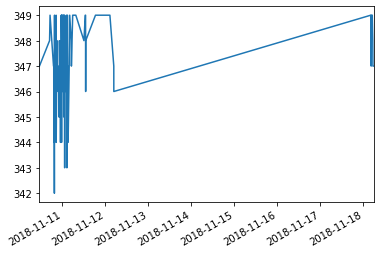

In [44]:
df_out[features[0]]['2018-10-28':'2018-11-25'].plot()  #sample plot of only the Aux. Power (with specified time range)

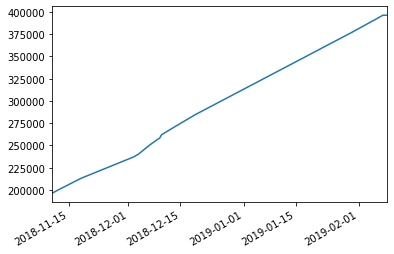

In [45]:
df_out[features[5]].plot()  #sample plot of Engine 2 Mass (Note: As can be seen, no Engine 2 mass values of 0kg are in the plot anymore due to filtering)

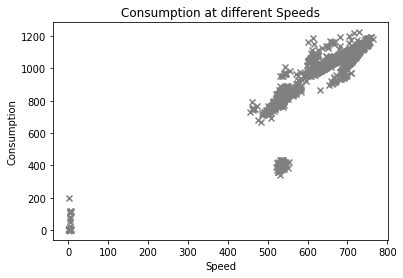

In [46]:
#Plotting variables using Scatter
plt.xlabel("Speed") 
plt.ylabel("Consumption") 
plt.title("Consumption at different Speeds")

plt.scatter(df_out[features[11]], df_out[features[1]], marker='x',color='gray')
plt.show()

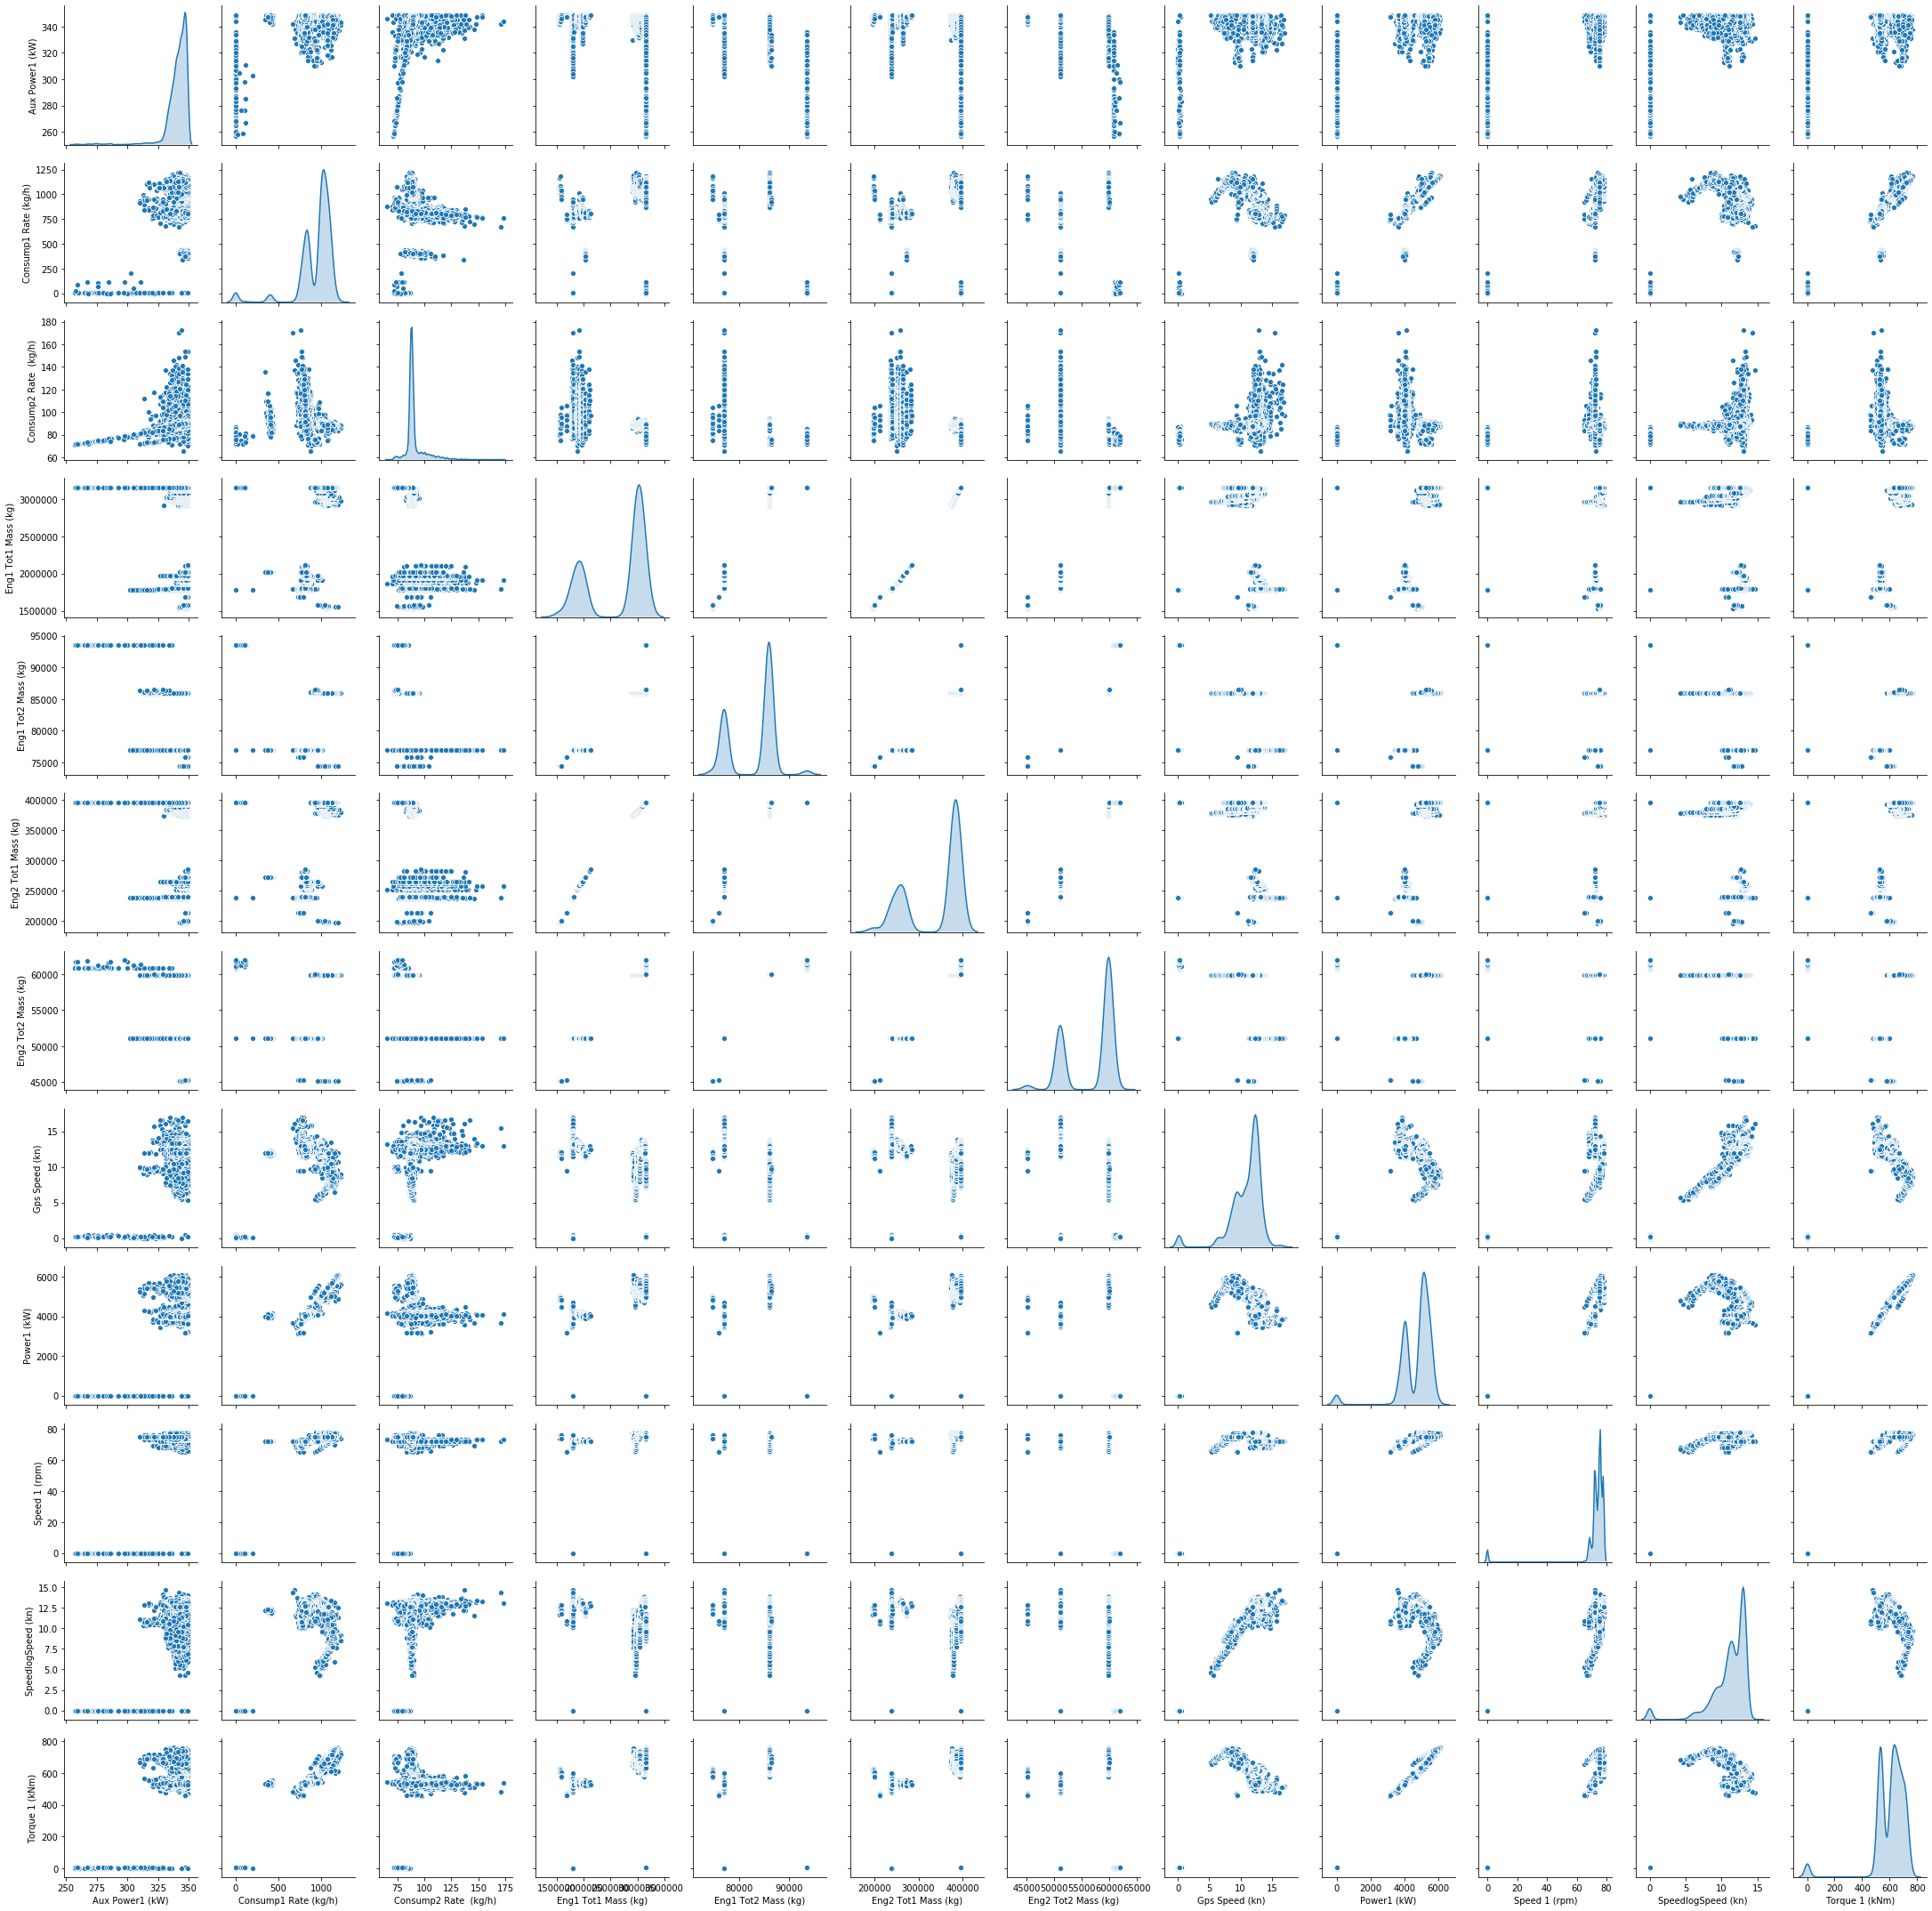

In [47]:
sns.pairplot(df_out[features], diag_kind="kde") #subplots of all the columns visualized using seaborne

In [48]:
#Data Explore
df_out.describe() #to generate statistical information about the data

,Aux Power1 (kW),Consump1 Rate (kg/h),Consump2 Rate (kg/h),Eng1 Tot1 Mass (kg),Eng1 Tot2 Mass (kg),Eng2 Tot1 Mass (kg),Eng2 Tot2 Mass (kg),Gps Speed (kn),Power1 (kW),Speed 1 (rpm),SpeedlogSpeed (kn),Torque 1 (kNm)
count,4529.000000,4529.000000,4529.000000,4.529000e+03,4529.000000,4529.000000,4529.000000,4529.000000,4529.000000,4529.000000,4529.000000,4529.000000
mean,341.190329,938.432700,90.952131,2.649397e+06,83002.841025,340314.114153,56844.669684,10.976220,4736.611835,72.501877,11.151115,605.741223
std,9.522430,205.891393,8.926441,5.496560e+05,4556.098769,63631.325252,4399.655366,2.528134,998.215580,12.255256,2.548419,120.892323
min,257.000000,1.100000,65.800000,1.536410e+06,74495.000000,196313.000000,45181.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,339.000000,843.700000,87.200000,1.967629e+06,76908.000000,264601.000000,51114.000000,9.800000,4110.000000,72.000000,10.400000,541.000000
50%,343.000000,1003.900000,88.500000,2.992256e+06,85952.000000,380842.000000,59893.000000,11.800000,5066.000000,75.000000,11.700000,627.000000
75%,347.000000,1058.000000,90.500000,3.048132e+06,85952.000000,385786.000000,59893.000000,12.500000,5327.000000,76.000000,12.900000,676.000000
max,349.000000,1223.200000,172.900000,3.158245e+06,93613.000000,396187.000000,62026.000000,17.000000,6109.000000,78.000000,14.700000,764.000000


In [49]:
#Comments: All plots look okay and they reflect both the filtering and the cleaning up of NaN values.

In [50]:
#PART 2 (Machine Learning)

In [51]:
#Choosing Label and Features:
#Consumption data trends would be relevant to assess. Consumpt1 is selected as the 'label' which means the ML model will be foreasting for it
#Selected Features will include speed (feature 11) and power (feature 9) 

In [52]:
#Defining the Label
label=features[1]

In [53]:
#Defining the test features
test_features = [features[9],
                 features[11]]

In [54]:
#Collating only relevant Training Data
all_data_train = pd.DataFrame() #creating a new database for training data

for n_ in test_features: #test_features data will now be split from the rest of the dataframe in df_out
    all_data_train[n_] = df_out[n_]

In [55]:
all_data_train.dropna() #non-relevant training data are dropped

,Speed 1 (rpm),Torque 1 (kNm)
2018-11-10 11:10:33,74.0,613.0
2018-11-10 16:49:33,76.0,626.0
2018-11-10 17:05:33,76.0,622.0
2018-11-10 19:01:33,76.0,627.0
2018-11-10 19:08:33,76.0,619.0
...,...,...
2019-02-08 09:49:31,0.0,5.0
2019-02-08 10:08:31,0.0,5.0
2019-02-08 11:49:31,0.0,6.0
2019-02-08 13:07:31,0.0,6.0


In [56]:
#Defining the Training model X and Y variables
X = np.array(all_data_train)
Y = np.array(df_out[label]) #Y will only include the 'label' data

In [57]:
X

array([[ 74., 613.],
       [ 76., 626.],
       [ 76., 622.],
       ...,
       [  0.,   6.],
       [  0.,   6.],
       [  0.,   6.]])

In [58]:
Y

array([1066.4, 1087.9, 1078.6, ...,  118. ,    3.8,  109.3])

In [60]:
#Importing Scikit-lern for ML Anlaysis
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [61]:
#Train or Test Split
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.75, test_size=0.25, random_state=42)
cores = -1 #all cores are used

RN Linear full data set: 0.860723629480849
Mean absolute percentage error 43.433424511991376 %


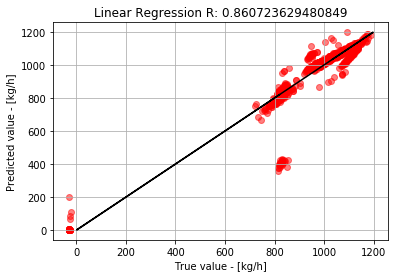

In [62]:
#Training the First Regression Model: Linear Regression
m_linear = sk.linear_model.LinearRegression(n_jobs=cores) #the regression model is first defined and fitted
m_linear.fit(X_train, y_train)

def mean_absolute_percentage_error(y_true, y_pred): #mean error function is defined between predicted and true values
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100 

R2_train_lin = r2_score(m_linear.predict(X_test),y_test) #measure of regression fit is run with the fitted X-test values
print('RN Linear full data set:', R2_train_lin)

error_lin = mean_absolute_percentage_error(y_test, m_linear.predict(X_test)) #mean error function used for x and y test values
print('Mean absolute percentage error', error_lin,'%')

plt.scatter(m_linear.predict(X_test),y_test,marker='o',alpha=0.5,color='r') #scatter plot generated for using m_linear fit for X-test values
plt.plot(y_test,y_test,color='black')

#forming general graph labels and titles
plt.grid()
plt.title('Linear Regression R: ' + str(R2_train_lin))
plt.xlabel('True value - [kg/h]')
plt.ylabel('Predicted value - [kg/h]')
plt.show()

In [63]:
#Note: Similar Annotations apply for the subsequent models

R2 SVR Regression full data set: 0.8430832061542262
Mean absolute percentage error 10.916501744073235 %


C:\Users\jale2\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


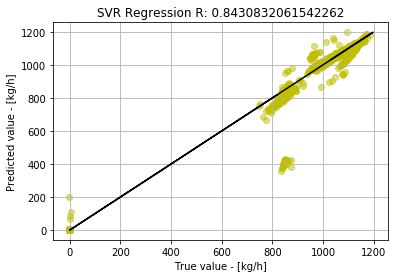

In [65]:
#Training the Second Regression Model: SVR Regression 
m_svr = sk.svm.LinearSVR(max_iter=500000)
m_svr.fit(X_train, y_train)

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

R2_train_svr = r2_score(m_svr.predict(X_test),y_test)
print('R2 SVR Regression full data set:', R2_train_svr)

error_svr = mean_absolute_percentage_error(y_test, m_svr.predict(X_test))
print('Mean absolute percentage error', error_svr,'%')

plt.scatter(m_svr.predict(X_test),y_test,marker='o',alpha=0.5,color='y')
plt.plot(y_test,y_test,color='black')

plt.grid()
plt.title('SVR Regression R: ' + str(R2_train_svr))
plt.xlabel('True value - [kg/h]')
plt.ylabel('Predicted value - [kg/h]')
plt.show()

R2 Random Forest full data set: 0.9060710041569637
Mean absolute percentage error 13.272316855714383 %


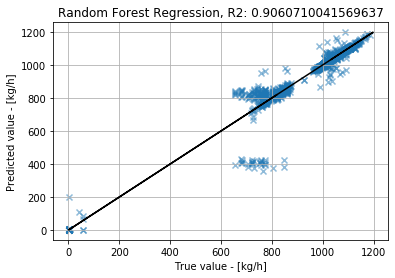

In [66]:
#Training the First ML Model: Random Forests
from sklearn.ensemble import RandomForestRegressor
m_rf = RandomForestRegressor(max_depth=50, random_state=42,n_estimators=300)
m_rf.fit(X_train, y_train)

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

R2_train_rf = r2_score(m_rf.predict(X_test),y_test)
print('R2 Random Forest full data set:', R2_train_rf)

error_rf = mean_absolute_percentage_error(y_test, m_rf.predict(X_test))
print('Mean absolute percentage error', error_rf,'%')

plt.scatter(m_rf.predict(X_test),y_test,marker='x',alpha=0.5)
plt.plot(y_test,y_test,color='black')

plt.grid()
plt.title('Random Forest Regression, R2: ' + str(R2_train_rf))
plt.xlabel('True value - [kg/h]')
plt.ylabel('Predicted value - [kg/h]')
plt.show()

R2 Shallow NN full data set: 0.8499695217282255
Mean absolute percentage error 8.38280175556483 %


C:\Users\jale2\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


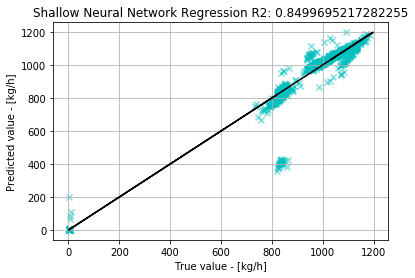

In [67]:
#Training the Second ML Model: Shallow Neural Networks
from sklearn.neural_network import MLPRegressor
m_NN = MLPRegressor(hidden_layer_sizes=100, activation='relu',alpha=0.0001)
m_NN.fit(X_train, y_train)

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

R2_train_NN = r2_score(m_NN.predict(X_test),y_test)
print('R2 Shallow NN full data set:', R2_train_NN)

error_NN = mean_absolute_percentage_error(y_test, m_NN.predict(X_test))
print('Mean absolute percentage error', error_NN,'%')

plt.scatter(m_NN.predict(X_test),y_test,marker='x',alpha=0.5,color='c')
plt.plot(y_test,y_test,color='black')

plt.grid()
plt.title('Shallow Neural Network Regression R2: ' + str(R2_train_NN))
plt.xlabel('True value - [kg/h]')
plt.ylabel('Predicted value - [kg/h]')
plt.show()

In [81]:
pip install xgboost #in order to use Gradient Boosting, the xgboost is first installed

Note: you may need to restart the kernel to use updated packages.


[23:35:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
R2 Gradient Boosting full data set: 0.906309063607752
Mean absolute percentage error 13.478175161761365 %


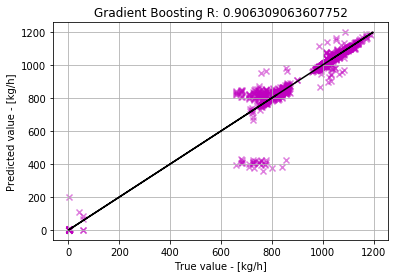

In [80]:
#Training the Third ML Model: Gradient Boosting
import xgboost as xgb
xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state=42)
xgb_model.fit(X_train, y_train)

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

R2_train_xgb = r2_score(xgb_model.predict(X_test),y_test)
print('R2 Gradient Boosting full data set:', R2_train_xgb)

error_xgb = mean_absolute_percentage_error(y_test, xgb_model.predict(X_test))
print('Mean absolute percentage error', error_xgb,'%')

plt.scatter(xgb_model.predict(X_test),y_test,marker='x',alpha=0.5,color='m')
plt.plot(y_test,y_test,color='black')

plt.grid()
plt.title('Gradient Boosting R: ' + str(R2_train_xgb))
plt.xlabel('True value - [kg/h]')
plt.ylabel('Predicted value - [kg/h]')
plt.show()

In [71]:
#Error Comparison
#In order to assess the fit of each regression model, the errors and R2 Trains are plotted and visualized 
errors=pd.DataFrame() #creating a new dataframe
errors_name=pd.DataFrame()
R2=pd.DataFrame()

#populating the greated dataframes
errors_name=['Linear Regression','SVR Regression','Random Forrest','Shallow NN','Gradient Boosting'] 
errors=[error_lin,error_svr,error_rf,error_NN,error_xgb]
R2=[R2_train_lin,R2_train_svr,R2_train_rf,R2_train_NN,R2_train_xgb]

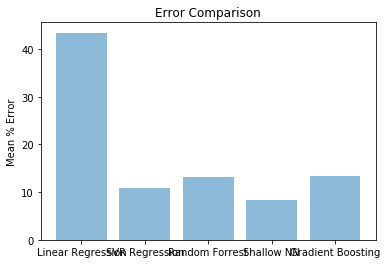

In [72]:
#Plotting Mean Errors from all models
plt.bar(errors_name,errors, align='center', alpha=0.5)
plt.ylabel('Mean % Error')
plt.title('Error Comparison')

plt.show()

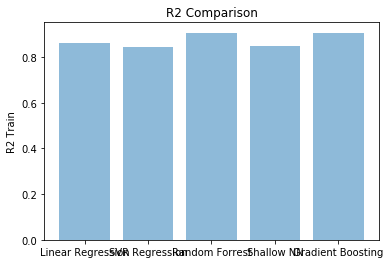

In [73]:
#Plotting R2 Values from all models
plt.bar(errors_name,R2, align='center', alpha=0.5)
plt.ylabel('R2 Train')
plt.title('R2 Comparison')

plt.show()

In [74]:
#Comments: 
#From the comparisons, it can be seen that the highest mean error (of the predicted and actual values) was from the Linear Regression Model. 
#This is expected as the linear model provides the simplest relationship for X and Y values. With non-linear trends, this model can become unreliable.
#With a model that is able to have a better fit with the actual data, this error is expected to decrease.
#The lowest error was obtained with the Shallow NN Regression
#This is not suprising as the more complex ML models are able to account or minize error by training to improve model fit.

#The R2 values helps to understand the correlation of the X and Y data.
#A low R2-score value means a low correlation of the independent variable (X) with the dependent variable (Y) 
#With relatively close R2 values to 1, the R2 Comparison Graph overall shows that there is decent correlation for all models.
#The highest correlation was found for both Gradient Boosting and Random Forest models.

In [75]:
#Visualization and Comparison of Model Fits with Original Data
all_data_models = df_out[features] #create a new database for modelled data

#all model predictions are defined for all values of X which are also the test_features
all_data_models['lin_regr'] = m_linear.predict(X) 
all_data_models['svr_regr'] = m_svr.predict(X)
all_data_models['randomf'] = m_rf.predict(X)
all_data_models['shallowNN'] = m_NN.predict(X)
all_data_models['xgb'] = xgb_model.predict(X)

In [76]:
all_data_models

,Aux Power1 (kW),Consump1 Rate (kg/h),Consump2 Rate (kg/h),Eng1 Tot1 Mass (kg),Eng1 Tot2 Mass (kg),Eng2 Tot1 Mass (kg),Eng2 Tot2 Mass (kg),Gps Speed (kn),Power1 (kW),Speed 1 (rpm),SpeedlogSpeed (kn),Torque 1 (kNm),lin_regr,svr_regr,randomf,shallowNN,xgb
2018-11-10 11:10:33,347.0,1066.4,89.4,1536410,74495,196313,45181,11.4,4744.0,74.0,11.6,613.0,950.744035,964.192917,1034.246380,954.569674,1064.234741
2018-11-10 16:49:33,348.0,1087.9,86.5,1542371,74495,196851,45181,12.0,5016.0,76.0,12.3,626.0,971.652191,985.206328,1020.749493,974.889457,1016.733154
2018-11-10 17:05:33,349.0,1078.6,85.6,1542668,74495,196875,45181,11.9,4955.0,76.0,12.3,622.0,965.289280,979.379856,1022.805886,968.740212,1020.901611
2018-11-10 19:01:33,347.0,1083.8,89.8,1544741,74495,197058,45181,11.6,5003.0,76.0,12.3,627.0,973.242919,986.662946,1019.183020,976.426768,1013.927307
2018-11-10 19:08:33,347.0,1082.0,85.0,1544860,74495,197068,45181,11.7,4937.0,76.0,12.4,619.0,960.517097,975.010002,1008.041896,964.128278,1008.891174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-02-08 09:49:31,259.0,83.0,71.9,3158245,93611,396187,61728,0.2,0.0,0.0,0.0,5.0,-24.880159,1.706242,56.319147,7.628480,57.650784
2019-02-08 10:08:31,286.0,1.1,74.3,3158245,93611,396187,61753,0.2,0.0,0.0,0.0,5.0,-24.880159,1.706242,56.319147,7.628480,57.650784
2019-02-08 11:49:31,267.0,118.0,73.5,3158245,93612,396187,61879,0.1,0.0,0.0,0.0,6.0,-23.289431,3.162860,41.003914,9.125532,41.169495
2019-02-08 13:07:31,297.0,3.8,75.5,3158245,93613,396187,61974,0.1,0.0,0.0,0.0,6.0,-23.289431,3.162860,41.003914,9.125532,41.169495


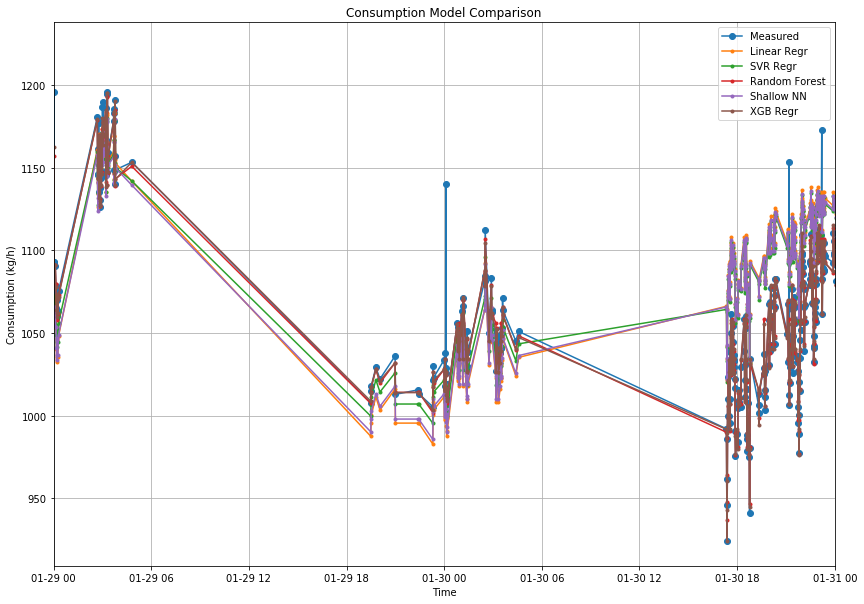

In [77]:
#Model Fit Comparison Visualized
date1='2019-01-29' #dates selected time range
date2='2019-01-31'

fig,ax = plt.subplots()
fig.set_size_inches(14, 10)

#all subplots are defined and labelled
plt.plot(all_data_models[label][date1:date2],marker='o',label='Measured')
plt.plot(all_data_models['lin_regr'][date1:date2],marker='.',label='Linear Regr')
plt.plot(all_data_models['svr_regr'][date1:date2],marker='.',label='SVR Regr')
plt.plot(all_data_models['randomf'][date1:date2],marker='.',label='Random Forest')
plt.plot(all_data_models['shallowNN'][date1:date2],marker='.',label='Shallow NN')
plt.plot(all_data_models['xgb'][date1:date2],marker='.',label='XGB Regr')

ax.grid()
ax.set(xlabel='Time', ylabel='Consumption (kg/h)',title='Consumption Model Comparison')

plt.legend(loc='upper right')
plt.xlim(pd.Timestamp(date1),pd.Timestamp(date2))
plt.show()

In [78]:
#Comments:
#From the figure, it can be found that the model which closely follows the measured values are the Xgb Model and Random Forrest model. 
#This is expected as they had the highest R2 values from the R2 Comparison Graph. 
#The Linear, SVR and Shallow NN follow a slightly similar predicted trend (owing to their low R2 score).

#There is a good overall fit among the the models (except for the linear model due to high error %).

In [83]:
#Conclusion:

#Data analysis is a growing valueable skill, with the rise of both digitization, ML/AI, and big data.
#For ship operations, data anlaysis can be helpful in making informed decisions based on historical or past data.
#Proper data forecasting also allows prediction of future trends. 
#With the right suite of tools for data analysis and visualization, along with the right data, it is possible to gain
#a tremendous amount of insights in a short amount of time.

#Through SciKit Learn, Pandas, Python, and Seaborne, well-predicted data could be generated using a given training data.

#Additional analysis that can be done on the data such as:
#-plotting trends over speed or power rather than time
#-trying additional optimization tools that use tensorflow
#-trying additional matplotlib vizualization tools

#Challenges from the assignment:
#Processing merged data - Initially,the Aux. Power and Consumpt1 Rate columns were not float or int types. 
#                         These values had the 'b' prefix and were designated as'object' type.
#                         To fix this, dropna() of non-numeric data was initially used which caused these columns to be filtered out
#                         This issue was resolved by modifying the pd.to_numeric function to include 'error='coerce'' rather than 'ignore'
#                         Without resolving this problem, plotting (or calling out dates) and filtering couldn't be done.
#Trying additional ML Models - Before using gradient boosting, TPOT or Python Automated ML was attempted.
#                         However, it was unable to distinguing the tpot module. Part of this could have been due to the use of a different 
#                         or more recent python version.

#Overall, it was interesting to see all these tools available for data visualization, machine learning and data analysis.
#Going through this assignment was helpful to both be introduced to sophisticated regression models and Jupyter Notebook/Python.